<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/Stock_Market_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
def fetch_financial_data(company):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

pzu = fetch_financial_data('PZU.PL')
pkn = fetch_financial_data('PKN.PL')
ge = fetch_financial_data('GE')
co = fetch_financial_data('KO')

In [3]:
pzu.columns = ['pzu_' + col.lower() for col in pzu.columns]
pkn.columns = ['pkn_' + col.lower() for col in pkn.columns]
ge.columns = ['ge_' + col.lower() for col in ge.columns]
co.columns = ['co_' + col.lower() for col in co.columns]

In [4]:
data_all = pd.concat(objs=[pkn, pzu, ge, co], axis=1)
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-10-26,54.903,56.584,54.687,55.843,1298356.0,29.127,29.644,29.025,29.604,2078481.0,26.509,26.636,26.411,26.538,54290988.0,36.303,36.413,36.049,36.158,17418997.0
2015-10-27,55.626,56.378,55.256,55.964,766215.0,29.644,30.015,29.381,29.936,1719800.0,26.411,26.617,26.253,26.458,75278982.0,36.082,36.309,36.067,36.178,35532465.0
2015-10-28,55.730,55.964,54.403,55.153,2773637.0,29.753,29.945,29.678,29.945,1500261.0,26.340,26.566,26.180,26.392,79144255.0,36.295,36.371,35.838,36.278,16098360.0
2015-10-29,54.989,54.998,54.169,54.437,1009269.0,29.831,29.839,29.151,29.252,1298929.0,26.198,26.382,26.100,26.348,47183011.0,36.216,36.421,35.946,36.327,11104173.0
2015-10-30,54.307,54.601,53.868,54.143,1445843.0,29.252,29.549,29.080,29.390,2258996.0,26.243,26.340,25.962,25.972,79081665.0,36.336,36.388,35.956,35.956,18087553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-16,40.820,42.450,40.020,42.100,1213883.0,22.910,23.150,22.340,22.990,2238979.0,6.960,7.350,6.935,7.290,169147263.0,49.990,50.350,49.870,50.030,13570887.0
2020-10-19,42.930,43.400,42.280,42.640,1263641.0,23.130,23.460,22.510,22.530,1384088.0,7.390,7.470,7.230,7.290,130837050.0,50.030,50.480,49.460,49.620,9930443.0
2020-10-20,42.600,43.080,41.440,42.450,867743.0,22.530,22.610,21.940,22.180,2928603.0,7.350,7.420,7.270,7.340,98420102.0,49.890,50.620,49.790,50.250,10972732.0


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
pkn_open,1247.0,8.002967e+01,1.916239e+01,4.082000e+01,5.998500e+01,8.361600e+01,9.634350e+01,1.229200e+02
pkn_high,1247.0,8.112465e+01,1.936923e+01,4.219000e+01,6.064250e+01,8.458300e+01,9.771350e+01,1.229200e+02
pkn_low,1247.0,7.883668e+01,1.898015e+01,4.002000e+01,5.909450e+01,8.245900e+01,9.527000e+01,1.208600e+02
pkn_close,1247.0,7.996186e+01,1.919705e+01,4.080000e+01,5.982350e+01,8.346700e+01,9.641000e+01,1.225000e+02
pkn_volume,1247.0,1.065601e+06,6.451658e+05,1.828340e+05,6.493635e+05,9.154220e+05,1.283378e+06,7.733447e+06
pzu_open,1247.0,3.343791e+01,6.166999e+00,2.071700e+01,2.803450e+01,3.626400e+01,3.861400e+01,4.224600e+01
pzu_high,1247.0,3.379533e+01,6.203260e+00,2.079300e+01,2.829800e+01,3.677500e+01,3.894050e+01,4.242300e+01
pzu_low,1247.0,3.302283e+01,6.147644e+00,2.050000e+01,2.756100e+01,3.586500e+01,3.819600e+01,4.177200e+01
pzu_close,1247.0,3.340483e+01,6.175692e+00,2.064900e+01,2.801900e+01,3.625000e+01,3.858350e+01,4.222800e+01
pzu_volume,1247.0,2.146361e+06,1.366578e+06,3.627720e+05,1.304445e+06,1.834579e+06,2.564372e+06,1.472682e+07


In [6]:
data_all.columns

Index(['pkn_open', 'pkn_high', 'pkn_low', 'pkn_close', 'pkn_volume',
       'pzu_open', 'pzu_high', 'pzu_low', 'pzu_close', 'pzu_volume', 'ge_open',
       'ge_high', 'ge_low', 'ge_close', 'ge_volume', 'co_open', 'co_high',
       'co_low', 'co_close', 'co_volume'],
      dtype='object')

In [7]:
data_close = [col for col in data_all.columns if col.endswith('close')]
data_close

['pkn_close', 'pzu_close', 'ge_close', 'co_close']

In [8]:
x = data_all[data_close] # dane - cena zamkniecia 
x.head()

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-10-26,55.843,29.604,26.538,36.158
2015-10-27,55.964,29.936,26.458,36.178
2015-10-28,55.153,29.945,26.392,36.278
2015-10-29,54.437,29.252,26.348,36.327
2015-10-30,54.143,29.390,25.972,35.956


In [9]:
x_2020 = x['2020-01-01' : ] #dane od początku 2020 roku
x.head(5)

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-10-26,55.843,29.604,26.538,36.158
2015-10-27,55.964,29.936,26.458,36.178
2015-10-28,55.153,29.945,26.392,36.278
2015-10-29,54.437,29.252,26.348,36.327
2015-10-30,54.143,29.390,25.972,35.956


In [10]:
close_pln = x_2020.iloc[:, :2]
close_pln

,pkn_close,pzu_close
Date,,
2020-01-02,85.544,41.30
2020-01-03,84.324,40.90
2020-01-06,NaN,NaN
2020-01-07,80.960,40.51
2020-01-08,80.212,39.66
...,...,...
2020-10-16,42.100,22.99
2020-10-19,42.640,22.53
2020-10-20,42.450,22.18


In [11]:
close_usd = x_2020.iloc[:, 2:]
close_usd

,ge_close,co_close
Date,,
2020-01-02,11.88,53.587
2020-01-03,11.92,53.296
2020-01-06,12.09,53.276
2020-01-07,12.00,52.866
2020-01-08,11.89,52.963
...,...,...
2020-10-16,7.29,50.030
2020-10-19,7.29,49.620
2020-10-20,7.34,50.250


**Plots (Matplotlib Pyplot)**

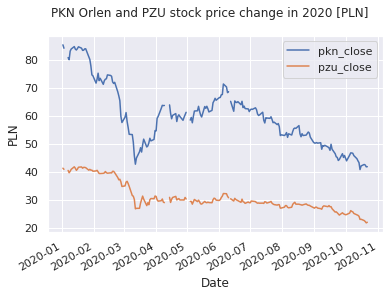

In [12]:
_ = close_pln.plot()
_ = plt.suptitle('PKN Orlen and PZU stock price change in 2020 [PLN]')
_ = plt.xlabel('Date')
_ = plt.ylabel('PLN')

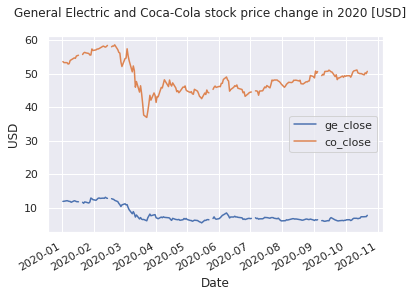

In [13]:

_ = close_usd.plot()
_ = plt.suptitle('General Electric and Coca-Cola stock price change in 2020 [USD]')
_ = plt.xlabel('Date')
_ = plt.ylabel('USD')

In [14]:
x_2020.reset_index(level=0, inplace=True)
x_2020

,Date,pkn_close,pzu_close,ge_close,co_close
0,2020-01-02,85.544,41.30,11.88,53.587
1,2020-01-03,84.324,40.90,11.92,53.296
2,2020-01-06,NaN,NaN,12.09,53.276
3,2020-01-07,80.960,40.51,12.00,52.866
4,2020-01-08,80.212,39.66,11.89,52.963
...,...,...,...,...,...
205,2020-10-16,42.100,22.99,7.29,50.030
206,2020-10-19,42.640,22.53,7.29,49.620
207,2020-10-20,42.450,22.18,7.34,50.250
208,2020-10-21,41.800,21.70,7.32,49.990


**Plots (Plotly Express)**

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pkn_close, name='PKN Orlen'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pzu_close, name='PZU'))

fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.ge_close, name='General Electric'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.co_close, name='Coca-Cola'))
fig.show()

In [ ]:
fig = go.Figure(data=go.Candlestick(x=data_all.Date, open=df.Open, high=df.High, low=df.Low, close=df.Close),layout=go.Layout(title_text='General Electric stock market in 2020'))
fig.show()